In [14]:
import re
import os

import pandas as pd
import numpy as np
from math import log

In [15]:
sample = pd.read_csv("/Users/WendiZhang/Desktop/FRE_NLP/Project/cik2.csv")

In [16]:
c = []
for i in range(len(sample)):
    c.append(re.findall(r"\d{10}",sample['cik'][i] ))
cik = []
for i in range(len(c)):
    cik += c[i]

In [17]:
sample['cik'] = cik

In [18]:
sample

,Name,cik
0,American Express Co,0000004962
1,Amgen Inc,0000318154
2,Apple Inc,0000320193
3,Boeing Co,0000012927
4,Caterpillar Inc,0000018230
5,Cisco Systems Inc,0000858877
6,Chevron Corp,0000093410
7,Goldman Sachs Group Inc,0000886982
8,Home Depot Inc,0000354950
9,Honeywell International Inc,0000773840


# Step 1. Read all 10-K documents

In [19]:
ciks = list(sample['cik'].drop([1,9,23,29,31]))

In [20]:
temp = []
parent_path = "/Users/WendiZhang/Desktop/FRE_NLP/Project/10K"
for c in ciks:
    path = os.path.join(parent_path, c)
    temp.append( os.listdir(path) )

In [21]:
files = []
for sublist in temp:
    for item in sublist:
        files.append(item)

In [22]:
files = [s for s in files if s != '.DS_Store']

In [23]:
df_files = pd.DataFrame()

In [24]:
df_files['file_names'] = files 
df_files['cik'] = files 

In [25]:
for i in range(len(df_files)):
    df_files['cik'][i] = df_files['cik'][i][:10]

In [26]:
df_files

,file_names,cik
0,0000004962_2014-02-25.txt,0000004962
1,0000004962_2011-02-28.txt,0000004962
2,0000004962_2012-02-24.txt,0000004962
3,0000004962_2017-02-17.txt,0000004962
4,0000004962_2015-02-24.txt,0000004962
...,...,...
261,0000078003_2017-02-23.txt,0000078003
262,0000078003_2011-02-28.txt,0000078003
263,0000078003_2015-02-27.txt,0000078003
264,0000078003_2018-02-22.txt,0000078003


In [27]:
tenK = []
#parent_path = "/Users/WendiZhang/Desktop/10K"
parent_path = "/Users/WendiZhang/Desktop/FRE_NLP/Project/10K"
for i in range(len(df_files)):
    #open("/Users/WendiZhang/Desktop/10K/sec_edgar_filings/AAPL/10-K/0000320193-17-000070.txt").read().split()
    
    #exec('{} = open( os.path.join(parent_path, files[i]) ).read().split()'.format(prefix+str(i)))
    path = os.path.join (os.path.join(parent_path, df_files['cik'][i]), df_files['file_names'][i] )
  
    tenK.append( open(path,'rb').read() )

In [28]:
len(tenK)

266

In [29]:
# bytes to str
for i in range(len(tenK)):
    tenK[i] = bytes.decode(tenK[i])

In [30]:
# upper
for i in range(len(tenK)):
    tenK[i] = tenK[i].upper()

In [31]:
tenK[1]

' 10-K 1 Y87970E10VK.HTM FORM 10-K  E10VK  TABLE OF CONTENTS          UNITED STATES SECURITIES AND     EXCHANGE COMMISSION WASHINGTON, D.C.     20549            FORM 10-K                              Þ        ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(D) OF THE     SECURITIES EXCHANGE ACT OF 1934             FOR THE FISCAL     YEAR ENDED DECEMBER 31, 2010      OR       O        TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(D) OF THE     SECURITIES EXCHANGE ACT OF 1934             FOR THE TRANSITION PERIOD     FROM          TO                           COMMISSION FILE     NO. 1-7657            AMERICAN EXPRESS     COMPANY   (EXACT NAME OF REGISTRANT AS     SPECIFIED IN ITS CHARTER)                      NEW YORK (STATE OR OTHER JURISDICTION     OF     INCORPORATION OR ORGANIZATION)       13-4922250 (I.R.S. EMPLOYER     IDENTIFICATION NO.)     WORLD FINANCIAL CENTER     200 VESEY STREET     NEW YORK, NEW YORK (ADDRESS OF PRINCIPAL     EXECUTIVE OFFICES)       10285 (ZIP     CODE)        

# Step 2. Basic filtering

## Tokenization

In [32]:
df_files['tenK']=tenK

In [33]:
from nltk import word_tokenize, punkt, pos_tag

In [34]:
df_files['tenK'] = df_files['tenK'].apply(word_tokenize)

## Remove punctuations

In [35]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string

In [36]:
len(df_files.iloc[0,2])

74172

In [37]:
for i in np.arange(len(df_files)):
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in df_files['tenK'][i]]
    # remove numbers
    words = [word for word in stripped if word.isalpha()]

    lemm = WordNetLemmatizer()
    words = [lemm.lemmatize(w) for w in words]
    
    df_files['tenK'][i] = words

In [38]:
len(df_files.iloc[0,2])

61941

## Stopwords filtering

In [194]:
parent_path2 = "/Users/WendiZhang/Desktop/FRE_NLP/Project/stop_words"
stop_word_file = os.listdir(parent_path2)

In [195]:
stop_word_file

['StopWords_Names.txt',
 'StopWords_Auditor.txt',
 'StopWords_Geographic.txt',
 'StopWords_Generic.txt',
 'StopWords_Currencies.txt',
 'StopWords_DatesandNumbers.txt',
 'StopWords_GenericLong.txt']

In [196]:
stopwords_list=[]

s_w_l=open(os.path.join(parent_path2,stop_word_file[3])).readlines()
for j in range(len(s_w_l)):
    s_w_l[j]=s_w_l[j].rstrip("\n")


In [197]:
stopwords_list = s_w_l

In [198]:
len(stopwords_list)

14107

In [199]:
def deletestop(txt):
    remain = [word for word in txt if word not in stopwords_list]
    return ' '.join(x for x in remain)
df_files['tenK'] = df_files['tenK'].apply(deletestop)

In [200]:
#before deleting stopwords
len(df_files.iloc[0,2])

295771

In [201]:
df_files['tenK'] = df_files['tenK'].apply(word_tokenize)

In [202]:
# after deleting stopwords
len(df_files.iloc[0,2])

35177

# Step 3. Calculation of the frequency of neg words

# 3.1Fin_neg word list

In [203]:
# first, read all negative words in Loughran_McDonald sentiment dictionary
LM_neg=pd.read_excel("/Users/WendiZhang/Desktop/FRE_NLP/Project/LoughranMcDonald_SentimentWordLists_2018.xlsx", 'Negative', header=None)

In [204]:
LM_neg.head()

,0
0,ABANDON
1,ABANDONED
2,ABANDONING
3,ABANDONMENT
4,ABANDONMENTS


In [205]:
LM_neg.columns = ['neg_words']
LM_neg = list(LM_neg['neg_words'])

In [206]:
len(LM_neg), LM_neg[0]

(2355, 'ABANDON')

## Frequency matrix-tf(i,j) of the equation 1

In [207]:
from collections import Counter

In [208]:
fre_matrix_LM_neg = pd.DataFrame(columns = LM_neg)

In [209]:
def freq_matrix(table):
    cont = Counter(table)
    for w in list(cont):
        if w not in LM_neg:
            del cont[w]
    return cont
table_freq = df_files.copy()
table_freq['tenK'] = table_freq['tenK'].apply(freq_matrix)
for i in range(len(table_freq)):
    fre_matrix_LM_neg = fre_matrix_LM_neg.append(table_freq['tenK'][i], ignore_index = True)

In [210]:
fre_matrix_LM_neg = fre_matrix_LM_neg.replace(np.nan, 0)
fre_matrix_LM_neg.head()

,ABANDON,ABANDONED,ABANDONING,ABANDONMENT,ABANDONMENTS,ABANDONS,ABDICATED,ABDICATES,ABDICATING,ABDICATION,...,WRITEDOWN,WRITEDOWNS,WRITEOFF,WRITEOFFS,WRONG,WRONGDOING,WRONGDOINGS,WRONGFUL,WRONGFULLY,WRONGLY
0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,15.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,23.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,40.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0


## Presence matrix-sum of the columns represent dfi in the equation 1

In [211]:
pre_matrix_LM_neg = fre_matrix_LM_neg.copy()
def convert_presence(x):
    if x != 0:
        return 1
    else:
        return x
for col in pre_matrix_LM_neg.columns:
    pre_matrix_LM_neg[col] = pre_matrix_LM_neg[col].apply(convert_presence)
    
pre_matrix_LM_neg.head()

,ABANDON,ABANDONED,ABANDONING,ABANDONMENT,ABANDONMENTS,ABANDONS,ABDICATED,ABDICATES,ABDICATING,ABDICATION,...,WRITEDOWN,WRITEDOWNS,WRITEOFF,WRITEOFFS,WRONG,WRONGDOING,WRONGDOINGS,WRONGFUL,WRONGFULLY,WRONGLY
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
df_j = pre_matrix_LM_neg.sum()

## Number of words in each document

In [213]:
df_num = df_files.copy()

In [214]:
for i in range(len(df_num)):
    df_num.loc[i,'length'] = len(df_num.loc[i,'tenK'])

In [215]:
df_num

,file_names,cik,tenK,length
0,0000004962_2014-02-25.txt,0000004962,"[FORM, FORM, TABLE, CONTENTS, UNITED, STATES, ...",35177.0
1,0000004962_2011-02-28.txt,0000004962,"[FORM, TABLE, CONTENTS, UNITED, STATES, SECURI...",35598.0
2,0000004962_2012-02-24.txt,0000004962,"[FORM, FORM, TABLE, CONTENTS, UNITED, STATES, ...",37443.0
3,0000004962_2017-02-17.txt,0000004962,"[FORM, FORM, TABLE, CONTENTS, UNITED, STATES, ...",47849.0
4,0000004962_2015-02-24.txt,0000004962,"[FORM, FORM, TABLE, CONTENTS, UNITED, STATES, ...",34226.0
...,...,...,...,...
261,0000078003_2017-02-23.txt,0000078003,"[FORM, DOCUMENT, UNITED, STATES, SECURITIES, E...",16535.0
262,0000078003_2011-02-28.txt,0000078003,"[FORM, FORM, TABLE, CONTENTS, UNITED, STATES, ...",11941.0
263,0000078003_2015-02-27.txt,0000078003,"[FORM, UNITED, STATESSECURITIES, EXCHANGE, COM...",13994.0
264,0000078003_2018-02-22.txt,0000078003,"[FORM, DOCUMENT, UNITED, STATES, SECURITIES, E...",17390.0


In [216]:
ave_len_10k=df_num.groupby('cik')['length'].mean()

In [217]:
ave_len_10k['0000004962']

40589.9

## Term weighting-w(i,j)

In [218]:
tf_idf_LM_neg = fre_matrix_LM_neg.copy()

In [219]:
N=tf_idf_LM_neg.shape[0]

In [220]:
for i in range(tf_idf_LM_neg.shape[0]):
    for j in range(tf_idf_LM_neg.shape[1]):
        if fre_matrix_LM_neg.iloc[i,j] >= 1.0:
            tf_idf_LM_neg.iloc[i,j] = (1+log(fre_matrix_LM_neg.iloc[i,j]))/(1+log(ave_len_10k[df_num.iloc[i,1]])) * log(N/df_j[j])

In [221]:
#Term weighting of negtive words in each 10-K document
w_j=tf_idf_LM_neg.sum(axis=1)

## Proportion of negtive words 

In [222]:
num_of_neg = fre_matrix_LM_neg.sum(axis=1)

In [223]:
num_of_neg

0      1207.0
1      1318.0
2      1449.0
3      1679.0
4      1261.0
        ...  
261     622.0
262     306.0
263     519.0
264     661.0
265     709.0
Length: 266, dtype: float64

In [224]:
df_LM_neg_result = pd.DataFrame()

In [225]:
df_LM_neg_result['file_names'] = df_files['file_names']
df_LM_neg_result['cik'] = df_files['cik']

In [226]:
df_LM_neg_result['tf_idf'] = w_j

In [227]:
for i in range(len(df_LM_neg_result)):
    df_LM_neg_result.loc[i,'proportion_neg'] = num_of_neg[i] / df_num.loc[i,'length']

In [228]:
df_LM_neg_result.head()

,file_names,cik,tf_idf,proportion_neg
0,0000004962_2014-02-25.txt,0000004962,50.000164,0.034312
1,0000004962_2011-02-28.txt,0000004962,48.700144,0.037025
2,0000004962_2012-02-24.txt,0000004962,59.272033,0.038699
3,0000004962_2017-02-17.txt,0000004962,58.799385,0.035090
4,0000004962_2015-02-24.txt,0000004962,53.132716,0.036843


## 3.2 H4N-INF

In [229]:
# first, read all words in H4N-INF
H4N_INF=pd.read_excel("/Users/WendiZhang/Desktop/FRE_NLP/Project/H4IV_inquireraugmented.xls")

In [230]:
H4_list=[]
for i in range(len(H4N_INF)):
    if H4N_INF.loc[i,'Negativ'] == 'Negativ':
        H4_list.append(H4N_INF.loc[i,'Entry'])

In [231]:
len(H4_list)

2291

## Frequency matrix-tf(i,j) of the equation 1

In [232]:
fre_matrix_H4 = pd.DataFrame(columns = H4_list)

In [233]:
def freq_matrix2(table):
    cont = Counter(table)
    for w in list(cont):
        if w not in H4_list:
            del cont[w]
    return cont
table_freq2 = df_files.copy()
table_freq2['tenK'] = table_freq2['tenK'].apply(freq_matrix2)
for i in range(len(table_freq2)):
    fre_matrix_H4 = fre_matrix_H4.append(table_freq2['tenK'][i], ignore_index = True)

In [234]:
fre_matrix_H4 = fre_matrix_H4.replace(np.nan, 0)
fre_matrix_H4.head()

,ABANDON,ABANDONMENT,ABATE,ABDICATE,ABHOR,ABJECT,ABNORMAL,ABOLISH,ABOMINABLE,ABRASIVE,...,WRETCHEDNESS,WRINKLE,WRITHE,WRONG#2,WRONG#3,WRONGFUL,WROUGHT,YAWN,YEARN,YELP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Presence matrix-sum of the columns represent dfi in the equation 1

In [235]:
pre_matrix_H4 = fre_matrix_H4.copy()
def convert_presence(x):
    if x != 0:
        return 1
    else:
        return x
for col in pre_matrix_H4.columns:
    pre_matrix_H4[col] = pre_matrix_H4[col].apply(convert_presence)
    
pre_matrix_H4.head()

,ABANDON,ABANDONMENT,ABATE,ABDICATE,ABHOR,ABJECT,ABNORMAL,ABOLISH,ABOMINABLE,ABRASIVE,...,WRETCHEDNESS,WRINKLE,WRITHE,WRONG#2,WRONG#3,WRONGFUL,WROUGHT,YAWN,YEARN,YELP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
df_j_H4 = pre_matrix_H4.sum()

## Term weighting-w(i,j)

In [237]:
tf_idf_H4 = fre_matrix_H4.copy()

In [238]:
fre_matrix_H4

,ABANDON,ABANDONMENT,ABATE,ABDICATE,ABHOR,ABJECT,ABNORMAL,ABOLISH,ABOMINABLE,ABRASIVE,...,WRETCHEDNESS,WRINKLE,WRITHE,WRONG#2,WRONG#3,WRONGFUL,WROUGHT,YAWN,YEARN,YELP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
for i in range(tf_idf_H4.shape[0]):
    for j in range(tf_idf_H4.shape[1]):
        if fre_matrix_H4.iloc[i,j] >= 1.0:
            tf_idf_H4.iloc[i,j] = (1+log(fre_matrix_H4.iloc[i,j]))/(1+log(ave_len_10k[df_num.iloc[i,1]])) * log(N/df_j_H4[H4_list[j]])

In [240]:
#Term weighting of negtive words in each 10-K document
w_j_H4=tf_idf_H4.sum(axis=1)

In [241]:
w_j_H4

0      21.038378
1      20.922879
2      22.558689
3      23.916869
4      22.074435
         ...    
261    14.117158
262    13.959651
263    10.944082
264    15.494644
265    16.033695
Length: 266, dtype: float64

## Proportion of negtive words 

In [242]:
num_of_neg_H4 = fre_matrix_H4.sum(axis=1)

In [243]:
df_H4_result = pd.DataFrame()

In [244]:
df_H4_result['file_names'] = df_files['file_names']
df_H4_result['cik'] = df_files['cik']

In [245]:
df_H4_result['tf_idf'] = w_j_H4

In [246]:
for i in range(len(df_H4_result)):
    df_H4_result.loc[i,'proportion_neg'] = num_of_neg_H4[i] / df_num.loc[i,'length']

In [247]:
df_H4_result.head()

,file_names,cik,tf_idf,proportion_neg
0,0000004962_2014-02-25.txt,0000004962,21.038378,0.018904
1,0000004962_2011-02-28.txt,0000004962,20.922879,0.020226
2,0000004962_2012-02-24.txt,0000004962,22.558689,0.020805
3,0000004962_2017-02-17.txt,0000004962,23.916869,0.016782
4,0000004962_2015-02-24.txt,0000004962,22.074435,0.019868


# Step 4 Excess Return

In [248]:
df_files

,file_names,cik,tenK
0,0000004962_2014-02-25.txt,0000004962,"[FORM, FORM, TABLE, CONTENTS, UNITED, STATES, ..."
1,0000004962_2011-02-28.txt,0000004962,"[FORM, TABLE, CONTENTS, UNITED, STATES, SECURI..."
2,0000004962_2012-02-24.txt,0000004962,"[FORM, FORM, TABLE, CONTENTS, UNITED, STATES, ..."
3,0000004962_2017-02-17.txt,0000004962,"[FORM, FORM, TABLE, CONTENTS, UNITED, STATES, ..."
4,0000004962_2015-02-24.txt,0000004962,"[FORM, FORM, TABLE, CONTENTS, UNITED, STATES, ..."
...,...,...,...
261,0000078003_2017-02-23.txt,0000078003,"[FORM, DOCUMENT, UNITED, STATES, SECURITIES, E..."
262,0000078003_2011-02-28.txt,0000078003,"[FORM, FORM, TABLE, CONTENTS, UNITED, STATES, ..."
263,0000078003_2015-02-27.txt,0000078003,"[FORM, UNITED, STATESSECURITIES, EXCHANGE, COM..."
264,0000078003_2018-02-22.txt,0000078003,"[FORM, DOCUMENT, UNITED, STATES, SECURITIES, E..."


In [249]:
parent_path3 = "/Users/WendiZhang/Desktop/FRE_NLP/Project/stock_return"

In [250]:
df_CRSP = pd.read_csv("/Users/WendiZhang/Desktop/FRE_NLP/Project/CRSP_value_weighted.csv")

In [251]:
Trade_day = list(df_CRSP['DATE'])

In [252]:
for i in range(len(df_files)):
    file_name = df_files.iloc[i,0]
    file_pa=os.path.join(parent_path3,file_name[0:10]+'.csv')
    file_date = int(file_name[11:15]+file_name[16:18]+file_name[19:21])
    df1=pd.read_csv(file_pa)
    for j in range(len(Trade_day)):
        if Trade_day[j] > file_date:
            index_day = j
            break
    b_h_return = pd.to_numeric(df1.loc[index_day:index_day+4,'RET']).sum()
    val_wei_return = pd.to_numeric(df_CRSP.loc[index_day:index_day+4,'vwretd']).sum()
    excess_return = b_h_return - val_wei_return
    df_LM_neg_result.loc[i,'excess_return'] = excess_return
    df_H4_result.loc[i,'excess_return'] = excess_return

In [253]:
df_LM_neg_result

,file_names,cik,tf_idf,proportion_neg,excess_return
0,0000004962_2014-02-25.txt,0000004962,50.000164,0.034312,0.013802
1,0000004962_2011-02-28.txt,0000004962,48.700144,0.037025,0.015050
2,0000004962_2012-02-24.txt,0000004962,59.272033,0.038699,-0.005897
3,0000004962_2017-02-17.txt,0000004962,58.799385,0.035090,0.000163
4,0000004962_2015-02-24.txt,0000004962,53.132716,0.036843,0.015338
...,...,...,...,...,...
261,0000078003_2017-02-23.txt,0000078003,31.033290,0.037617,0.008845
262,0000078003_2011-02-28.txt,0000078003,19.663101,0.025626,0.030802
263,0000078003_2015-02-27.txt,0000078003,26.291035,0.037087,0.004531
264,0000078003_2018-02-22.txt,0000078003,32.436533,0.038010,0.007300


In [254]:
df_H4_result

,file_names,cik,tf_idf,proportion_neg,excess_return
0,0000004962_2014-02-25.txt,0000004962,21.038378,0.018904,0.013802
1,0000004962_2011-02-28.txt,0000004962,20.922879,0.020226,0.015050
2,0000004962_2012-02-24.txt,0000004962,22.558689,0.020805,-0.005897
3,0000004962_2017-02-17.txt,0000004962,23.916869,0.016782,0.000163
4,0000004962_2015-02-24.txt,0000004962,22.074435,0.019868,0.015338
...,...,...,...,...,...
261,0000078003_2017-02-23.txt,0000078003,14.117158,0.019111,0.008845
262,0000078003_2011-02-28.txt,0000078003,13.959651,0.018005,0.030802
263,0000078003_2015-02-27.txt,0000078003,10.944082,0.019508,0.004531
264,0000078003_2018-02-22.txt,0000078003,15.494644,0.019954,0.007300


# Step 5 Plot based on Term Weighted Index

In [315]:
df_LM_neg_result = df_LM_neg_result.sort_values(by=['tf_idf'])
df_LM_neg_result

,file_names,cik,tf_idf,proportion_neg,excess_return
99,0000200406_2013-02-22.txt,0000200406,1.766283,0.011192,0.004075
96,0000200406_2014-02-21.txt,0000200406,1.775527,0.010602,-0.005915
94,0000200406_2011-02-25.txt,0000200406,1.840532,0.010925,0.020599
93,0000200406_2010-03-01.txt,0000200406,1.846996,0.011092,-0.011587
95,0000200406_2012-02-23.txt,0000200406,2.437211,0.013868,-0.001632
...,...,...,...,...,...
218,0000070858_2011-02-25.txt,0000070858,89.012933,0.048167,-0.007473
114,0000019617_2019-02-26.txt,0000019617,89.281919,0.035432,-0.009425
217,0000070858_2013-02-28.txt,0000070858,89.324210,0.051309,0.070176
118,0000019617_2013-02-28.txt,0000019617,89.419297,0.041062,0.015907


In [316]:
q = int(len(df_LM_neg_result)/5)

In [317]:
q

53

In [318]:
m1_LM = df_LM_neg_result.iloc[0:q+1, 4].median()
m2_LM = df_LM_neg_result.iloc[q+1:2*q+1, 4].median()
m3_LM = df_LM_neg_result.iloc[2*q+1:3*q+1, 4].median()
m4_LM = df_LM_neg_result.iloc[3*q+1:4*q+1, 4].median()
m5_LM = df_LM_neg_result.iloc[4*q+1:, 4].median()

In [319]:
median_LM = [m1_LM, m2_LM, m3_LM, m4_LM, m5_LM]

In [320]:
median_LM

[-0.00215, -0.002495000000000011, 0.002822, 0.00011399999999999952, 0.004229]

In [321]:
len(df_LM_neg_result.iloc[4*q+1:, 4])+len(df_LM_neg_result.iloc[0:q+1, 4])+len(df_LM_neg_result.iloc[q+1:2*q+1, 4])+len(df_LM_neg_result.iloc[2*q+1:3*q+1, 4])+len(df_LM_neg_result.iloc[3*q+1:4*q+1, 4])

266

In [322]:
df_H4_result = df_H4_result.sort_values(by=['tf_idf'])
df_H4_result

,file_names,cik,tf_idf,proportion_neg,excess_return
221,0000732717_2012-02-24.txt,0000732717,1.297840,0.006298,0.017437
223,0000732717_2011-03-01.txt,0000732717,1.304210,0.006822,0.001616
220,0000732717_2015-02-20.txt,0000732717,1.397635,0.006426,0.015866
222,0000732717_2014-02-21.txt,0000732717,1.410916,0.007187,-0.039203
224,0000732717_2010-02-25.txt,0000732717,1.473633,0.006763,-0.015242
...,...,...,...,...,...
215,0000070858_2012-02-23.txt,0000070858,29.335213,0.019248,0.008025
170,0000086312_2016-02-11.txt,0000086312,29.615298,0.028506,-0.009929
171,0000086312_2017-02-16.txt,0000086312,29.770966,0.029974,-0.001558
174,0000086312_2012-02-16.txt,0000086312,29.964163,0.030057,-0.019741


In [323]:
q_H4 = int(len(df_H4_result)/5)

In [324]:
m1_H4 = df_H4_result.iloc[0:q_H4+1, 4].median()
m2_H4 = df_H4_result.iloc[q_H4+1:2*q_H4+1, 4].median()
m3_H4 = df_H4_result.iloc[2*q_H4+1:3*q_H4+1, 4].median()
m4_H4 = df_H4_result.iloc[3*q_H4+1:4*q_H4+1, 4].median()
m5_H4 = df_H4_result.iloc[4*q_H4+1:, 4].median()

In [325]:
median_H4 = [m1_H4, m2_H4, m3_H4, m4_H4, m5_H4]

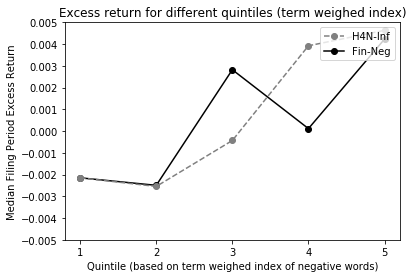

In [327]:
import matplotlib.pyplot as plt

p1, = plt.plot( [1, 2, 3, 4, 5], median_LM, 'black', label="Fin-Neg", marker='o')
p2, = plt.plot( [1, 2, 3, 4, 5], median_H4, 'grey', label = "H4N-Inf", marker='o', linestyle='dashed')
plt.legend(handles =[p2, p1], loc='upper right')
plt.xlabel('Quintile (based on term weighed index of negative words)')
plt.ylabel('Median Filing Period Excess Return')
plt.xticks(range(1, 6))
plt.yticks(np.arange(-0.005, 0.006, step=0.001)) 
plt.title("Excess return for different quintiles (term weighed index)") 

plt.show()


# Step 6 Plot based on Proportional Weighted Index

In [328]:
df_LM_neg_result = df_LM_neg_result.sort_values(by=['proportion_neg'])

m1_LM = df_LM_neg_result.iloc[0:q+1, 4].median()
m2_LM = df_LM_neg_result.iloc[q+1:2*q+1, 4].median()
m3_LM = df_LM_neg_result.iloc[2*q+1:3*q+1, 4].median()
m4_LM = df_LM_neg_result.iloc[3*q+1:4*q+1, 4].median()
m5_LM = df_LM_neg_result.iloc[4*q+1:, 4].median()

median_LM = [m1_LM, m2_LM, m3_LM, m4_LM, m5_LM]

In [329]:
df_H4_result = df_H4_result.sort_values(by=['proportion_neg'])

m1_H4 = df_H4_result.iloc[0:q_H4+1, 4].median()
m2_H4 = df_H4_result.iloc[q_H4+1:2*q_H4+1, 4].median()
m3_H4 = df_H4_result.iloc[2*q_H4+1:3*q_H4+1, 4].median()
m4_H4 = df_H4_result.iloc[3*q_H4+1:4*q_H4+1, 4].median()
m5_H4 = df_H4_result.iloc[4*q_H4+1:, 4].median()

median_H4 = [m1_H4, m2_H4, m3_H4, m4_H4, m5_H4]

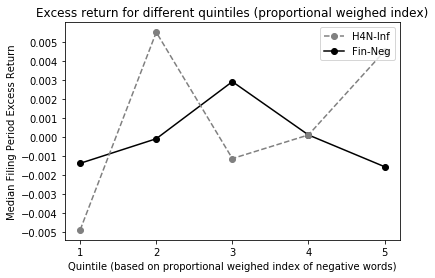

In [330]:
p1, = plt.plot( [1, 2, 3, 4, 5], median_LM, 'black', label="Fin-Neg", marker='o')
p2, = plt.plot( [1, 2, 3, 4, 5], median_H4, 'grey', label = "H4N-Inf", marker='o', linestyle='dashed')
plt.legend(handles =[p2, p1], loc='upper right')
plt.xlabel('Quintile (based on proportional weighed index of negative words)')
plt.ylabel('Median Filing Period Excess Return')
plt.xticks(range(1, 6))
plt.yticks(np.arange(-0.005, 0.006, step=0.001)) 
plt.title("Excess return for different quintiles (proportional weighed index)") 

plt.show()

# Explain results
Explain your results and the difference between the proportional weighting vs. the Term Weighting.

1. Our plots are different from Figure 1 in the paper, since we are only looking at Dow30 stocks from 2010-2019 which means our dataset is much smaller than the one the authors used. Thus, we are not seeing a decrease of excess return along with the increase of negative words quintile. 
2. In general, the Term Weighted Index should have a better performance than the simple Propotional Weighted Index in terms of explaining the sentiment of a 10K (or any other financial report). That's because it considers three important factors: 
1) the importance of a term within a document (often measured by proportional occurrence or the log of frequency); 
2) normalization for document length; 
3) the importance of a term within the entire corpus (typically measured by inverse document frequency).
3. While the proportional weighted index only cosndiers the raw word counts